In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

# Readin Image GrayScale and Blur

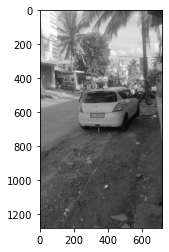

In [2]:
img = cv2.imread('pcar2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# Apply Filters and Find Edges

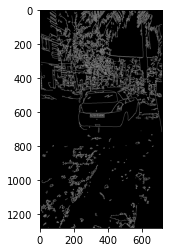

In [3]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# Finding Contous and Apply Mask



In [4]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location


array([[[296, 609]],

       [[296, 626]],

       [[373, 626]],

       [[373, 609]]], dtype=int32)

In [7]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

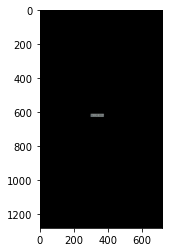

In [8]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

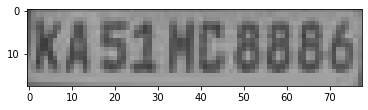

In [10]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# Use easyocr to Read the Text

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[0, 0], [78, 0], [78, 18], [0, 18]], 'Ka51Hc8886', 0.20023678153680552)]

In [12]:
text = result[0][-2]
text

'Ka51Hc8886'

# Fetching Information

In [13]:
import requests
import xmltodict
import json
import parser

In [14]:
def get_vehicle_info(text):
    r = requests.get("http://www.regcheck.org.uk/api/reg.asmx/CheckIndia?RegistrationNumber={0}&username=prithvi18".format(str(text)))
    data = xmltodict.parse(r.content)
    jdata = json.dumps(data)
    df = json.loads(jdata)
    df1 = json.loads(df['Vehicle']['vehicleJson'])
    return df1

In [15]:
get_vehicle_info(text)

{'Description': 'YAMAHA FASCINO 113 CC SCOOTER',
 'RegistrationYear': '2018',
 'CarMake': {'CurrentTextValue': 'YAMAHA'},
 'CarModel': {'CurrentTextValue': 'FASCINO'},
 'Variant': '113 CC SCOOTER',
 'EngineSize': {'CurrentTextValue': '113'},
 'MakeDescription': {'CurrentTextValue': 'YAMAHA'},
 'ModelDescription': {'CurrentTextValue': 'FASCINO'},
 'NumberOfSeats': {'CurrentTextValue': '2'},
 'VechileIdentificationNumber': 'ME1SED124J0167510',
 'EngineNumber': 'E3Y3E0422107',
 'FuelType': {'CurrentTextValue': 'Petrol'},
 'RegistrationDate': '29-JUN-18',
 'Owner': '',
 'Fitness': '',
 'Insurance': '',
 'PUCC': '',
 'VehicleType': 'M-CYCLE/SCOOTER(2WN)',
 'Location': 'RTO,CHENNAKESHAVANAGAR',
 'ImageUrl': 'http://www.carregistrationapi.in/image.aspx/@WUFNQUhBIEZBU0NJTk8gMTEzIENDIFNDT09URVI='}